In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf #deeplearning library

In [3]:
(data_train, label_train), (data_test, label_test) = tf.keras.datasets.mnist.load_data()

In [4]:
data_train.shape, data_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
data=np.concatenate((data_train,data_test),axis=0)
label=np.concatenate((label_train,label_test),axis=0)
data.shape, label.shape

((70000, 28, 28), (70000,))

In [6]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output=train_test_split(data,label,test_size=0.2)

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Conv2D #kernel
from keras.layers import Flatten 
from keras.layers import MaxPooling2D #pooling

In [8]:
Cnn=Sequential()
Cnn.add(Conv2D(3, input_shape=(28,28,1), kernel_size=(3,3),padding="same", activation="relu"))
Cnn.add(MaxPooling2D(2))
Cnn.add(Flatten())
Cnn.add(Dense(200,activation="relu"))
Cnn.add(Dropout(0.2))
Cnn.add(Dense(100,activation="relu"))
Cnn.add(Dense(10,activation="softmax")) #0~9
Cnn.compile(loss="sparse_categorical_crossentropy",metrics="accuracy",optimizer="adam")

C:\Users\used3\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Expected `metrics` argument to be a list, tuple, or dict. Received instead: metrics=accuracy of type <class 'str'>

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

Cnn = Sequential()
Cnn.add(Input(shape=(28, 28, 1)))  # 입력 모양을 Input 레이어로 정의
Cnn.add(Conv2D(3, kernel_size=(3, 3), padding="same", activation="relu"))
Cnn.add(MaxPooling2D(2))
Cnn.add(Flatten())
Cnn.add(Dense(200, activation="relu"))
Cnn.add(Dropout(0.2))
Cnn.add(Dense(100, activation="relu"))
Cnn.add(Dense(10, activation="softmax"))  # 0~9
Cnn.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
#Keras는 이전에는 Conv2D와 같은 레이어의 input_shape 매개변수를 통해 입력 크기를 지정 할 수 있었음. 
#현재는 더 구조화된 방식으로 Input(shape=...)을 사용=> 입력을 정의하는 것이 권장

In [10]:
Cnn.fit(train_input,train_output,epochs=5, batch_size=100)

Epoch 1/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.7411 - loss: 4.1089
Epoch 2/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9314 - loss: 0.2390
Epoch 3/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9543 - loss: 0.1510
Epoch 4/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9668 - loss: 0.1096
Epoch 5/5
560/560 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9703 - loss: 0.0954


In [11]:
Cnn.evaluate(test_input,test_output)

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9715 - loss: 0.1060


[0.10636424273252487, 0.9695714116096497]

In [12]:
import cv2

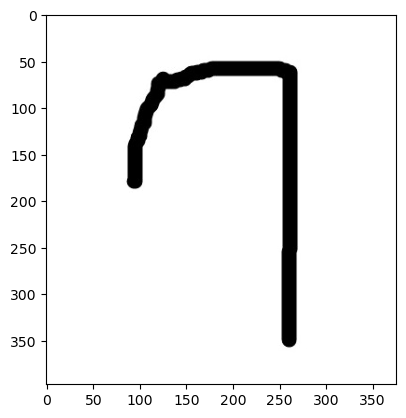

In [14]:
test = cv2.imread("C:/CNN_TEST/number_7.JPG", cv2.IMREAD_GRAYSCALE)
plt.imshow(test, cmap='gray')

In [15]:
test

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [16]:
test_BW=255-test

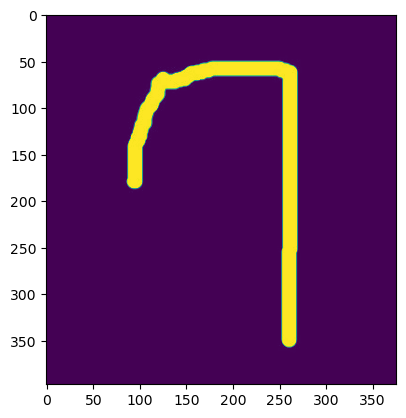

In [17]:
plt.imshow(test_BW)

In [18]:
test_BW.shape

(397, 376)

In [19]:
test_BW_size=cv2.resize(test_BW,(28,28))
test_BW_size.shape

(28, 28)

In [20]:
test_BW_size_re=test_BW_size.reshape(1,28,28)
test_BW_size_re.shape

(1, 28, 28)

In [21]:
Cnn.predict(test_BW_size_re)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


array([[6.45659881e-09, 3.13209192e-08, 5.52228857e-06, 5.63811540e-08,
        9.99979734e-01, 2.33024746e-08, 3.27593284e-07, 9.06602281e-07,
        1.33378935e-05, 4.91259700e-09]], dtype=float32)

In [22]:
np.argmax(Cnn.predict(test_BW_size_re))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


4